Mounted at /content/drive/


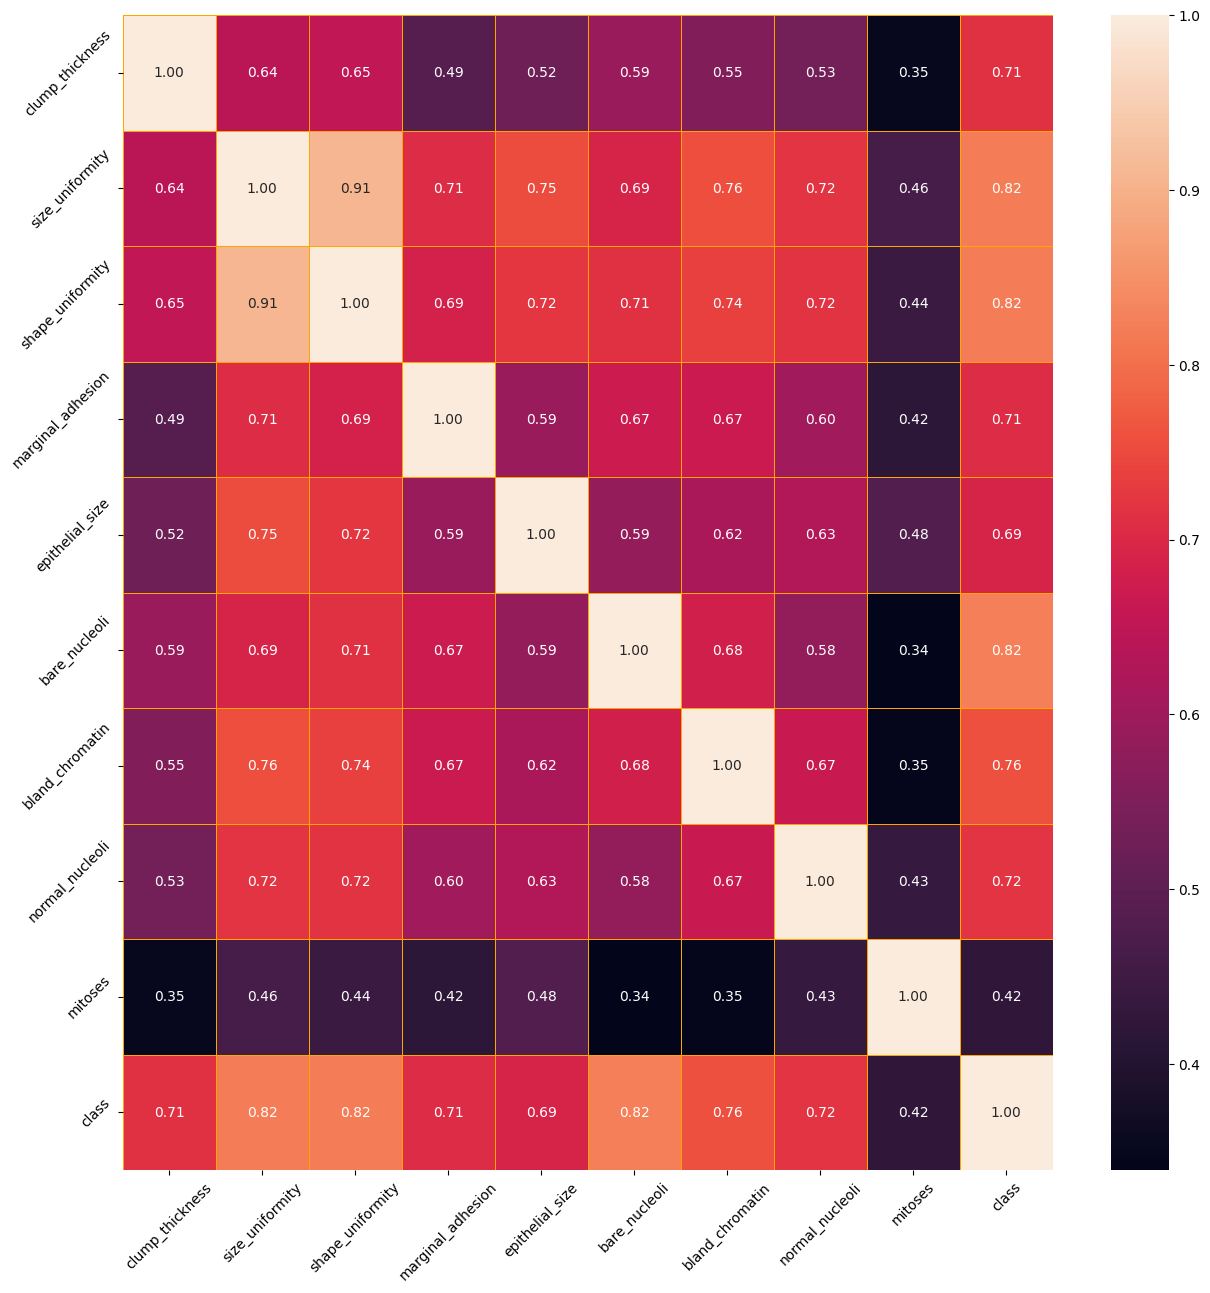

KNN accuracy = 96.58536585365853


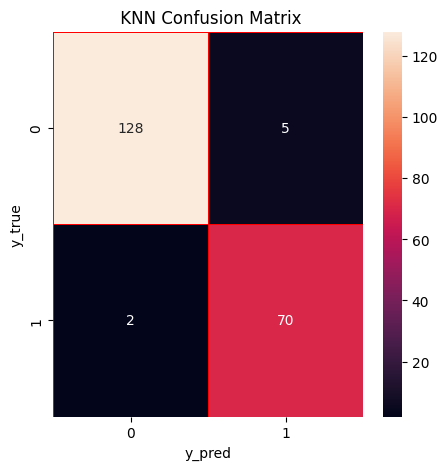

svm test accuracy = 98.04878048780488


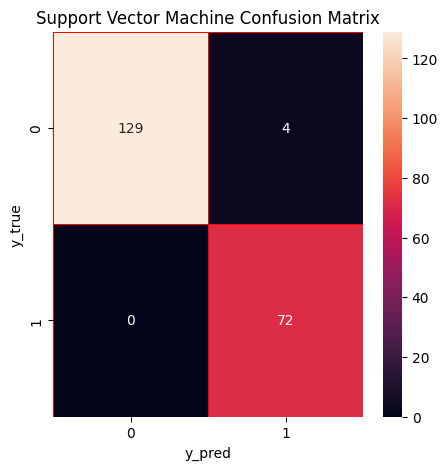

Decision Tree accuracy: 97.5609756097561


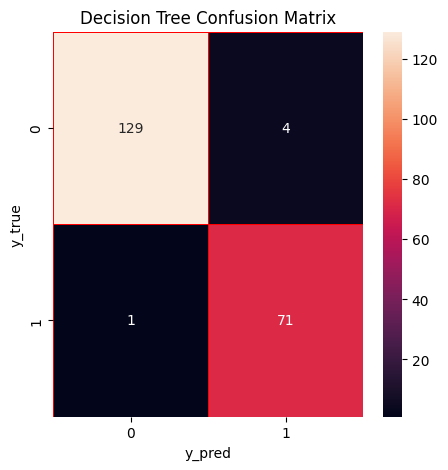

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

from google.colab import drive
drive.mount("/content/drive/")

import warnings
warnings.filterwarnings('ignore')

data=pd.read_csv("/content/drive/MyDrive/breastCancerrrdt.csv")
#data=pd.read_csv("/content/drive/MyDrive/Data Mining Project/breastCancerrrdt.csv")


data.drop("id",axis=1,inplace=True)
df=data.dropna(axis=0)
df.index=range(0,len(df),1)

dtype_object=df.select_dtypes(include=['object'])
dtype_object.head()
df["bare_nucleoli"] = df["bare_nucleoli"][df["bare_nucleoli"]!='?']
df.dropna(inplace=True)



df["bare_nucleoli"] = df["bare_nucleoli"].astype("int64")

#HEAT MAP #correlation of parameters
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

score=[]
algorithms=[]


#KNN
from sklearn.neighbors import KNeighborsClassifier
y=df["class"].values
x_data=df.drop(["class"],axis=1)

#Normalization
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))


#Preparing the test and training set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

#model and accuracy
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn.predict(x_test)
score.append(knn.score(x_test,y_test)*100)
algorithms.append("KNN")
print("KNN accuracy =",knn.score(x_test,y_test)*100)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title(" KNN Confusion Matrix")
plt.show()

#Support Vector Machine
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
score.append(svm.score(x_test,y_test)*100)
algorithms.append("Support Vector Machine")
print("svm test accuracy =",svm.score(x_test,y_test)*100)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=svm.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Support Vector Machine Confusion Matrix")
plt.show()

#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("Decision Tree accuracy:",dt.score(x_test,y_test)*100)
score.append(dt.score(x_test,y_test)*100)
algorithms.append("Decision Tree")

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=dt.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Decision Tree Confusion Matrix")
plt.show()



In [ ]:
!pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.9 MB/s eta 0:00:00


In [2]:
pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 275.9 kB/s eta 0:00:00
